In [1]:
import datacube_stats
import matplotlib
from skimage import exposure
from matplotlib import pyplot as plt
import numpy as np

import yaml
from datacube_stats import StatsApp
from datacube import Datacube

config_yaml = """
sources:
  - product: ls_usgs_wofs
    measurements: [water]
    group_by: solar_day
    mask_nodata: False
    fuse_func: digitalearthau.utils.wofs_fuser

date_ranges:
    start_date: 2017-01-01
    end_date: 2017-12-31
storage:
    # this driver enables in-memory computation
    driver: xarray
    crs: EPSG:32660
    tile_size:
        x: 40000.0
        y: 40000.0
    resolution:
        x: 30
        y: -30
    chunking:
        x: 200
        y: 200
        time: 1
    dimension_order: [time, y, x]
computation:
    chunking:
        x: 800
        y: 800

input_region:
    "geometry": {
        "type": "Polygon",
        "coordinates": [ [
            [ 177.981830, -17.706179 ],
            [ 178.056535, -17.706179 ],
            [ 178.056535, -17.761842 ],
            [ 177.981830, -17.761842 ],
            [ 177.981830, -17.706179 ]
          ] ]
      }

output_products:
  - name: wofs_summary
    statistic: wofs_summary
    product_type: wofs_statistical_summary
"""

# or manually creating a config dictionary works too
config = yaml.load(config_yaml)

dc = Datacube()
app = StatsApp(config, dc.index)

print('generating tasks')
tasks = app.generate_tasks(dc.index)

generating tasks


In [2]:
#Set up colour ramp details
wofs_cmap = matplotlib.colors.ListedColormap(['#000000', '#e38400', '#e3df00', '#62e300',
                                       '#00e384', '#00e3c8', '#00c5e3', '#0097e3', 
                                       '#005fe3', '#000fe3', '#5700e3'])
wofs_bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
#wofs_norm = matplotlib.colors.BoundaryNorm(wofs_bounds, wofs_cmap.N)

def show_output(output):
    frequency = output.result['wofs_summary'].frequency.isel(time=0)
    
    #Create WOfS image with specified colour ramp details
    fig = plt.figure(figsize =(10,5)) 
    i=frequency.plot.imshow(cmap = wofs_cmap,vmin = 0, vmax = 1)
    plt.colorbar(i, ticks=wofs_bounds, 
                ).set_label(label='WOfS (%)',
                 size=12) #Add definable colour bar
    fig.delaxes(fig.axes[1]) #Remove pre-defined colour bar

    plt.show() #Create image

running tasks


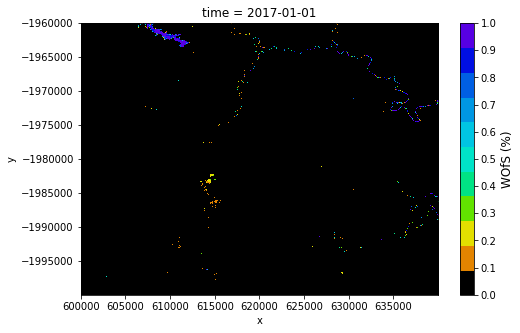

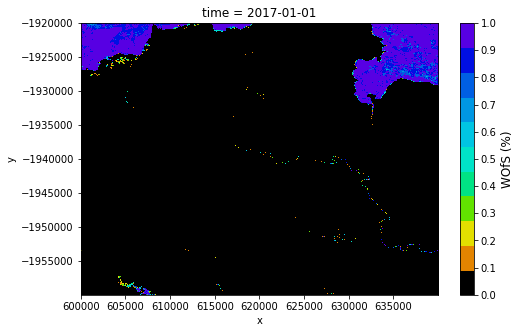

processing complete


In [3]:
print('running tasks')
for task in tasks:
    # this method is only available for the xarray output driver
    show_output(app.execute_task(task))

print('processing complete')